In [1]:
# Import Required Libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('tested_worldwide.csv')

# Display the first 5 rows of the dataset
print(df.head())

         Date Country_Region Province_State  positive  active  hospitalized  \
0  2020-01-16        Iceland     All States       3.0     NaN           NaN   
1  2020-01-17        Iceland     All States       4.0     NaN           NaN   
2  2020-01-18        Iceland     All States       7.0     NaN           NaN   
3  2020-01-20    South Korea     All States       1.0     NaN           NaN   
4  2020-01-22  United States     All States       0.0     NaN           NaN   

   hospitalizedCurr  recovered  death  total_tested  daily_tested  \
0               NaN        NaN    NaN           NaN           NaN   
1               NaN        NaN    NaN           NaN           NaN   
2               NaN        NaN    NaN           NaN           NaN   
3               NaN        NaN    NaN           4.0           NaN   
4               NaN        NaN    0.0           0.0           NaN   

   daily_positive  
0             NaN  
1             1.0  
2             3.0  
3             NaN  
4         

In [2]:
# Display the first 5 rows of the dataframe
print(df.head())



         Date Country_Region Province_State  positive  active  hospitalized  \
0  2020-01-16        Iceland     All States       3.0     NaN           NaN   
1  2020-01-17        Iceland     All States       4.0     NaN           NaN   
2  2020-01-18        Iceland     All States       7.0     NaN           NaN   
3  2020-01-20    South Korea     All States       1.0     NaN           NaN   
4  2020-01-22  United States     All States       0.0     NaN           NaN   

   hospitalizedCurr  recovered  death  total_tested  daily_tested  \
0               NaN        NaN    NaN           NaN           NaN   
1               NaN        NaN    NaN           NaN           NaN   
2               NaN        NaN    NaN           NaN           NaN   
3               NaN        NaN    NaN           4.0           NaN   
4               NaN        NaN    0.0           0.0           NaN   

   daily_positive  
0             NaN  
1             1.0  
2             3.0  
3             NaN  
4         

In [3]:
df.shape

(27641, 12)

In [4]:
df.dtypes

Date                 object
Country_Region       object
Province_State       object
positive            float64
active              float64
hospitalized        float64
hospitalizedCurr    float64
recovered           float64
death               float64
total_tested        float64
daily_tested        float64
daily_positive      float64
dtype: object

In [5]:

# Display the number of rows and columns in the dataframe
rows, columns = df.shape
print(f'The dataframe has {rows} rows and {columns} columns.')

The dataframe has 27641 rows and 12 columns.


In [6]:
# Display the data types of each column
print(df.dtypes)

Date                 object
Country_Region       object
Province_State       object
positive            float64
active              float64
hospitalized        float64
hospitalizedCurr    float64
recovered           float64
death               float64
total_tested        float64
daily_tested        float64
daily_positive      float64
dtype: object


In [7]:
print(f'The dataframe has {rows} rows and {columns} columns.')

The dataframe has 27641 rows and 12 columns.


In [8]:
missing_values = df.isnull().sum()
print(missing_values)

Date                    0
Country_Region          0
Province_State          0
positive             4242
active               9833
hospitalized        19231
hospitalizedCurr    13080
recovered            9626
death                4010
total_tested          912
daily_tested         1174
daily_positive       4557
dtype: int64


In [9]:
unique_values = df.nunique()
print(unique_values)

Date                  297
Country_Region        147
Province_State         81
positive            14998
active               9554
hospitalized         4862
hospitalizedCurr     2904
recovered            9183
death                5641
total_tested        23610
daily_tested        13375
daily_positive       3440
dtype: int64


In [10]:
#Drop the columns that are not needed for the analysis
data = df[['Country_Region', 'positive', 'total_tested']]

In [11]:
# Rename the columns to make them more readable
df = df.rename(columns={
    'Country_Region': 'Country',
    'positive': 'Positive Cases',
    'total_tested': 'Total Tested'
})

In [12]:
#Drop the rows that have missing values
#df.dropna(inplace=True)

In [13]:
# Fill missing values with 0 before converting data types
df['Positive Cases'] = df['Positive Cases'].fillna(0).astype('int')
df['Total Tested'] = df['Total Tested'].fillna(0).astype('int')
df['Country'] = df['Country'].astype('category')


In [14]:
#Display the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Date                    0
Country                 0
Province_State          0
Positive Cases          0
active               9833
hospitalized        19231
hospitalizedCurr    13080
recovered            9626
death                4010
Total Tested            0
daily_tested         1174
daily_positive       4557
dtype: int64


In [15]:
# Group by 'Country' and sum the 'PositiveCases'
total_positive_cases = df.groupby('Country')['Positive Cases'].sum().reset_index()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7720\3209899423.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_positive_cases = df.groupby('Country')['Positive Cases'].sum().reset_index()


In [16]:
# Group the data by 'Country' and calculate the sum of 'PositiveCases'

total_positive_cases = df.groupby('Country')['Positive Cases'].sum()

# Create a new dataframe with the total positive cases for each country

df_total_positive_cases = pd.DataFrame({'Country': total_positive_cases.index, 'Total Positive Cases': total_positive_cases.values})

# Display the new dataframe

df_total_positive_cases

C:\Users\Admin\AppData\Local\Temp\ipykernel_7720\1444516936.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_positive_cases = df.groupby('Country')['Positive Cases'].sum()


Country  Total Positive Cases
0    Afghanistan                     0
1        Albania                 12279
2        Algeria                     0
3      Argentina                 28220
4        Armenia               7225809
..           ...                   ...
142      Uruguay                  2160
143   Uzbekistan                     0
144       Veneto                119910
145    Venezuela                   461
146      Vietnam                  6450

[147 rows x 2 columns]

In [17]:
df_total_positive_cases = df_total_positive_cases.sort_values(by='Total Positive Cases', ascending=False)
print(df_total_positive_cases)

              Country  Total Positive Cases
141     United States            1837768204
61              Italy              64199206
20             Canada              50960416
9          Bangladesh              43771939
135            Turkey              16556205
..                ...                   ...
97    Northern Cyprus                     0
99               Oman                     0
103  Papua New Guinea                     0
104          Paraguay                     0
73              Libya                     0

[147 rows x 2 columns]


In [18]:
top_ten_countries = df_total_positive_cases.head(10)
print(top_ten_countries)

            Country  Total Positive Cases
141   United States            1837768204
61            Italy              64199206
20           Canada              50960416
9        Bangladesh              43771939
135          Turkey              16556205
29          Czechia              11233471
112          Russia              10669646
4           Armenia               7225809
24       Costa Rica               6782196
140  United Kingdom               4924956


In [19]:
# Rename the columns in the data dataframe to match the renamed columns in df
data = data.rename(columns={
    'Country_Region': 'Country',
    'positive': 'Positive Cases',
    'total_tested': 'Total Tested'
})

# Group the data by 'Country' and calculate the sum of 'Total Tested'
total_tests = data.groupby('Country')['Total Tested'].sum()

# Create a new dataframe with the total tests conducted for each country
df_total_tests = pd.DataFrame({'Country': total_tests.index, 'Total Tests': total_tests.values})

# Display the new dataframe
df_total_tests

Country  Total Tests
0    Afghanistan     736034.0
1        Albania     662739.0
2        Algeria     885940.0
3      Argentina   15237364.0
4        Armenia   35667650.0
..           ...          ...
142      Uruguay    1537741.0
143   Uzbekistan    1771000.0
144       Veneto    1650118.0
145    Venezuela    4273402.0
146      Vietnam   10166200.0

[147 rows x 2 columns]

In [20]:
df_total_tests.sort_values(by='Total Tests', ascending=False, inplace=True)

In [22]:
df_total_tests.head(10)

Country   Total Tests
141  United States  2.359218e+10
55           India  6.344627e+09
5        Australia  1.829832e+09
20          Canada  1.797987e+09
61           Italy  1.547472e+09
60          Israel  3.932104e+08
105           Peru  3.233958e+08
112         Russia  3.003005e+08
45         Germany  2.468220e+08
9       Bangladesh  2.331498e+08

In [23]:
# Merge the two dataframes on the 'Country' column
merged_df = pd.merge(df_total_positive_cases, df_total_tests, on='Country')

# Display the merged dataframe
print(merged_df)

              Country  Total Positive Cases   Total Tests
0       United States            1837768204  2.359218e+10
1               Italy              64199206  1.547472e+09
2              Canada              50960416  1.797987e+09
3          Bangladesh              43771939  2.331498e+08
4              Turkey              16556205  2.283259e+08
..                ...                   ...           ...
142   Northern Cyprus                     0  1.167023e+06
143              Oman                     0  5.422230e+05
144  Papua New Guinea                     0  1.147250e+05
145          Paraguay                     0  2.018686e+06
146             Libya                     0  1.965490e+05

[147 rows x 3 columns]


In [24]:
# Create a new column that contains the ratio of positive cases to the number of tests conducted
merged_df['Positive Test Rate'] = merged_df['Total Positive Cases'] / merged_df['Total Tests']


In [25]:
# Sort the dataframe by 'Positive Test Rate' in descending order
sorted_df = merged_df.sort_values(by='Positive Test Rate', ascending=False)

# Display the sorted dataframe
print(sorted_df)

                              Country  Total Positive Cases  Total Tests  \
30                            Iceland                391672          0.0   
101  Democratic Republic of the Congo                   971       3228.0   
27                           Lombardy                511276    1707191.0   
8                          Costa Rica               6782196   23602300.0   
41                           Piedmont                140163     532122.0   
..                                ...                   ...          ...   
120                         Sri Lanka                     0    2714976.0   
119                             Sudan                     0      80688.0   
118                        Uzbekistan                     0    1771000.0   
117                              Togo                     0     239228.0   
146                             Libya                     0     196549.0   

     Positive Test Rate  
30                  inf  
101            0.300805  
27       

In [26]:
# Display the top three countries with the highest ratio of positive cases to the number of tests conducted
top_countries = merged_df.nlargest(3, 'Positive Test Rate')
top_countries[['Country', 'Positive Test Rate']]

Country  Positive Test Rate
30                            Iceland                 inf
101  Democratic Republic of the Congo            0.300805
27                           Lombardy            0.299484

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Country'>

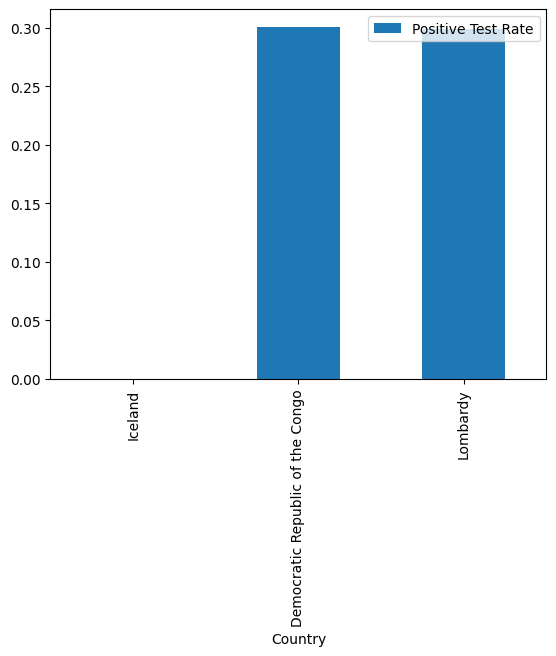

In [27]:
#Display the results a chart that shows the top three countries with the highest ratio of positive cases to the number

# %pip install matplotlib
import matplotlib.pyplot as plt

top_countries.plot(x='Country', y='Positive Test Rate', kind='bar')

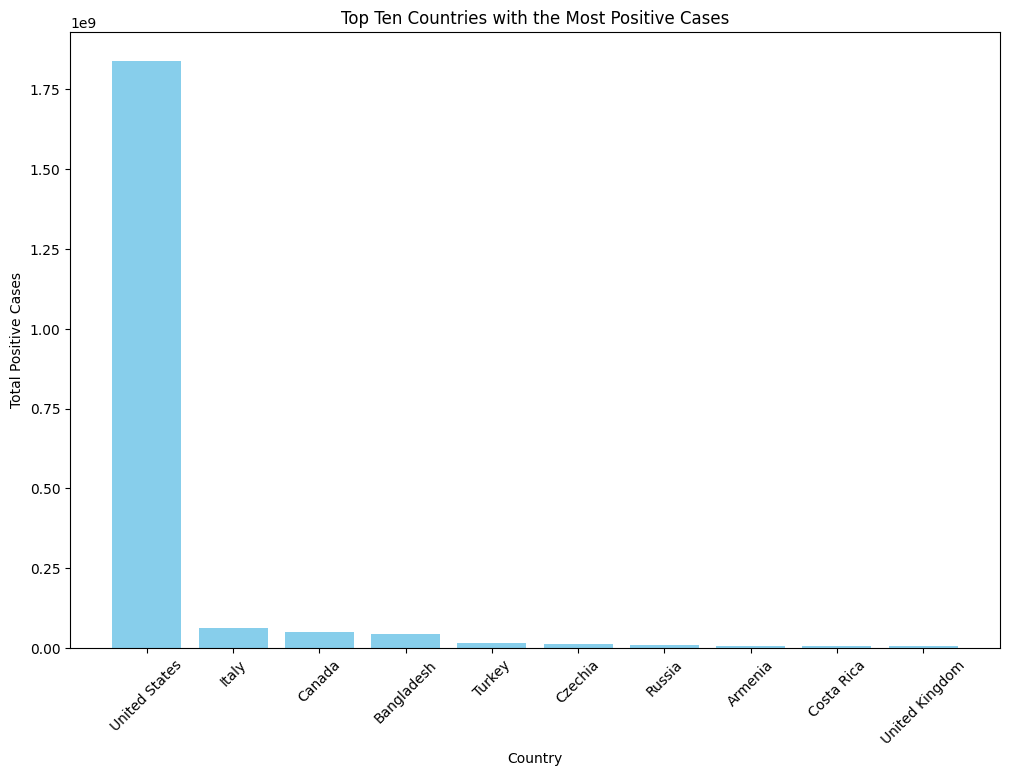

In [28]:
import matplotlib.pyplot as plt

# Plot the top ten countries with the most positive cases
plt.figure(figsize=(12, 8))
plt.bar(top_ten_countries['Country'], top_ten_countries['Total Positive Cases'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Positive Cases')
plt.title('Top Ten Countries with the Most Positive Cases')
plt.xticks(rotation=45)
plt.show()

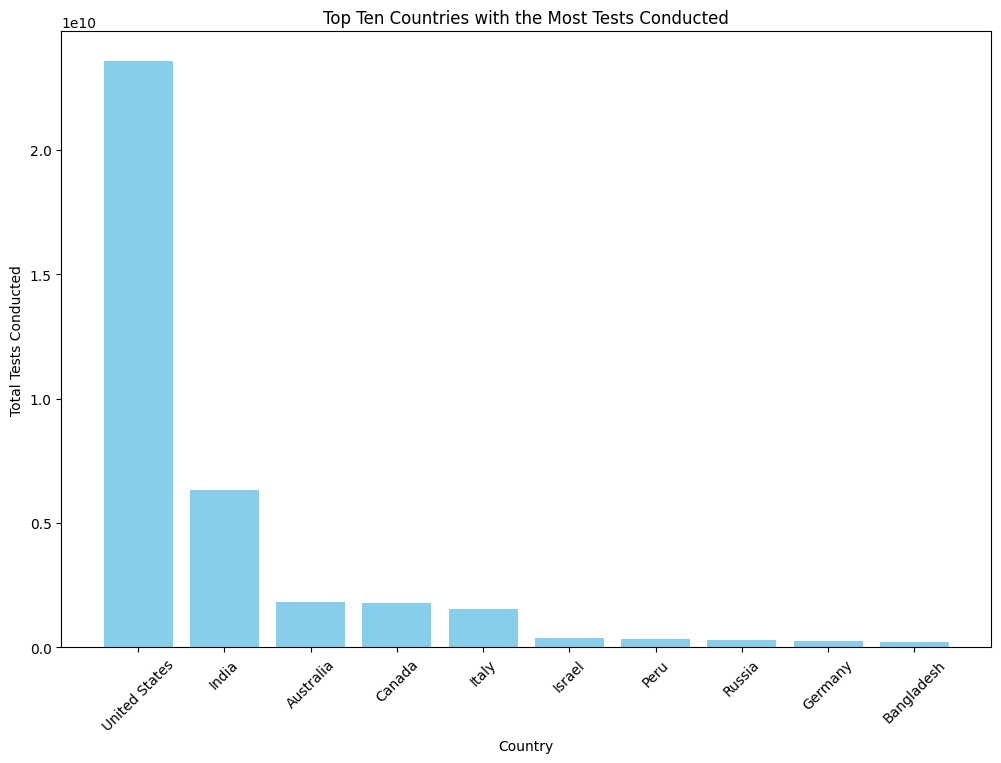

In [29]:
#Display the results in a chart that shows the top ten countries with the most tests conducted
import matplotlib.pyplot as plt

# Plot the top ten countries with the most tests conducted
plt.figure(figsize=(12, 8))
plt.bar(df_total_tests.head(10)['Country'], df_total_tests.head(10)['Total Tests'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Tests Conducted')
plt.title('Top Ten Countries with the Most Tests Conducted')
plt.xticks(rotation=45)
plt.show()